In [1]:
#import the required libraries

import sklearn
import time
import pandas as pd
import fastf1 as ff1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extracting the Data From FastF1

In [2]:
#create empty dataframes
all_laps = pd.DataFrame()
all_weather = pd.DataFrame()
all_data = pd.DataFrame()

In [3]:
#call sessions
#call sessions
zandvoort23=ff1.get_session(2023,13,'R')
monza23=ff1.get_session(2023,14,'R')
singapore23=ff1.get_session(2023,15,'R')


req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\HAL9K\AppData\Local\Temp\fastf1.
	Size: 354.91 MB


In [4]:
#load sessions
zandvoort23.load()
monza23.load()
singapore23.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27', '40', '77', '22', '20', '63', '24', '16', '2']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
r

In [5]:
#call laps
zandvoort23Laps = zandvoort23.laps
monza23Laps = monza23.laps
singapore23Laps = singapore23.laps

In [6]:
#add event
zandvoort23Laps['event']='R13_23 '
monza23Laps['event']='R14_23 '
singapore23Laps['event']='R15_23 '

In [7]:
#add circuit
zandvoort23Laps['circuit']='Zandvoort'
monza23Laps['circuit']='Monza'
singapore23Laps['circuit']='Singapore'

In [8]:
#add weather data
zandvoort23LapsWeather=zandvoort23Laps.get_weather_data()
monza23LapsWeather=monza23Laps.get_weather_data()
singapore23LapsWeather=singapore23Laps.get_weather_data()


In [9]:
#append laps data to all laps
all_laps = all_laps.append(zandvoort23Laps, ignore_index=True)
all_laps = all_laps.append(monza23Laps, ignore_index=True)
all_laps = all_laps.append(singapore23Laps, ignore_index=True)


C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1665537091.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_laps = all_laps.append(zandvoort23Laps, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1665537091.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_laps = all_laps.append(monza23Laps, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1665537091.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_laps = all_laps.append(singapore23Laps, ignore_index=True)


In [10]:
#append weather data to all weather
all_weather = all_weather.append(zandvoort23LapsWeather, ignore_index=True)
all_weather = all_weather.append(monza23LapsWeather, ignore_index=True)
all_weather = all_weather.append(singapore23LapsWeather, ignore_index=True)


C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\3509308744.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_weather = all_weather.append(zandvoort23LapsWeather, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\3509308744.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_weather = all_weather.append(monza23LapsWeather, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\3509308744.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_weather = all_weather.append(singapore23LapsWeather, ignore_index=True)


In [11]:
#combine in all_data
all_data = all_data.append(all_laps, ignore_index=True)

C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\4118466839.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(all_laps, ignore_index=True)


In [12]:
#join weather data
all_data = all_data.join(all_weather,lsuffix='_lap',rsuffix='_weather')

In [13]:
all_data

,Time_lap,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,event,circuit,Time_weather,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 01:03:36.822000,VER,1,0 days 00:01:31.585000,1.0,1.0,0 days 00:14:44.885000,NaT,NaT,0 days 00:00:28.929000,...,R13_23,Zandvoort,0 days 01:02:46.506000,17.6,67.0,1007.7,False,29.5,135,1.8
1,0 days 01:05:26.794000,VER,1,0 days 00:01:49.972000,2.0,1.0,NaT,0 days 01:05:25.519000,0 days 00:00:36.330000,0 days 00:00:36.685000,...,R13_23,Zandvoort,0 days 01:03:46.505000,17.5,67.0,1007.7,True,28.6,157,1.7
2,0 days 01:07:15.452000,VER,1,0 days 00:01:48.658000,3.0,2.0,0 days 01:05:45.581000,NaT,0 days 00:00:49.822000,0 days 00:00:30.905000,...,R13_23,Zandvoort,0 days 01:05:46.519000,17.2,69.0,1007.9,True,27.3,158,1.2
3,0 days 01:08:40.703000,VER,1,0 days 00:01:25.251000,4.0,2.0,NaT,NaT,0 days 00:00:29.996000,0 days 00:00:29.479000,...,R13_23,Zandvoort,0 days 01:07:46.610000,16.7,70.0,1007.7,True,26.2,187,1.3
4,0 days 01:10:04.164000,VER,1,0 days 00:01:23.461000,5.0,2.0,NaT,NaT,0 days 00:00:28.478000,0 days 00:00:29.064000,...,R13_23,Zandvoort,0 days 01:08:46.562000,16.4,68.0,1007.7,True,24.8,150,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0 days 02:43:23.690000,PIA,81,0 days 00:01:39.516000,58.0,2.0,NaT,NaT,0 days 00:00:28.760000,0 days 00:00:42.758000,...,R15_23,Singapore,0 days 02:42:24.001000,29.5,76.0,1010.2,False,34.9,160,2.0
3394,0 days 02:45:03.118000,PIA,81,0 days 00:01:39.428000,59.0,2.0,NaT,NaT,0 days 00:00:28.846000,0 days 00:00:42.820000,...,R15_23,Singapore,0 days 02:43:24.016000,29.5,76.0,1010.2,False,35.0,173,2.0
3395,0 days 02:46:42.307000,PIA,81,0 days 00:01:39.189000,60.0,2.0,NaT,NaT,0 days 00:00:28.727000,0 days 00:00:42.662000,...,R15_23,Singapore,0 days 02:45:24.015000,29.5,76.0,1010.2,False,35.1,191,1.8
3396,0 days 02:48:21.923000,PIA,81,0 days 00:01:39.616000,61.0,2.0,NaT,NaT,0 days 00:00:28.891000,0 days 00:00:42.782000,...,R15_23,Singapore,0 days 02:47:24.014000,29.5,76.0,1010.0,False,34.9,171,1.7


In [14]:
all_data.shape

(3398, 41)

In [15]:
all_data.to_csv("SimulationData.csv")

Circuit Characterstics scrapped from Pirelli's pre race graphics were added to the above data and any columns not needed were removed in Excel. The new file was called f1stint_data.csv and that file was used for the project ahead.

#### Load Data, and Sanity Checks

In [16]:
#loading the data
stint_data = pd.read_csv('f1stint_data.csv')

In [17]:
stint_data.head()

,EVENT,circuit,driver,team,stint,compound,average_laptime,position_change,freshtyre,track_status,...,avg_tracktemp,traction,braking,lateral,tyre_stress,asphalt_grip,asphalt_abrasion,track_evolution,downforce,tyre_life
0,R10_19,Silverstone,ALB,Toro Rosso,1,SOFT,94.207923,0.821314,False,1,...,31.484615,1,2,5,5,4,3,3,4,18
1,R10_19,Silverstone,BOT,Mercedes,1,MEDIUM,92.046750,0.000000,False,1,...,31.856250,1,2,5,5,4,3,3,4,21
2,R10_19,Silverstone,BOT,Mercedes,3,SOFT,92.462429,0.000000,False,1,...,27.628571,1,2,5,5,4,3,3,4,10
3,R10_19,Silverstone,GAS,Red Bull Racing,1,MEDIUM,92.863167,0.276385,False,1,...,31.466667,1,2,5,5,4,3,3,4,17
4,R10_19,Silverstone,HUL,Renault,1,SOFT,94.276154,0.392232,False,1,...,31.492308,1,2,5,5,4,3,3,4,16


In [18]:
#checking dataset information
stint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EVENT             2236 non-null   object 
 1   circuit           2236 non-null   object 
 2   driver            2236 non-null   object 
 3   team              2236 non-null   object 
 4   stint             2236 non-null   int64  
 5   compound          2236 non-null   object 
 6   average_laptime   2236 non-null   float64
 7   position_change   2236 non-null   float64
 8   freshtyre         2236 non-null   bool   
 9   track_status      2236 non-null   int64  
 10  avg_airtemp       2236 non-null   float64
 11  avg_humidity      2236 non-null   float64
 12  avg_airpressure   2236 non-null   float64
 13  avg_tracktemp     2236 non-null   float64
 14  traction          2236 non-null   int64  
 15  braking           2236 non-null   int64  
 16  lateral           2236 non-null   int64  


In [19]:
#correcting the datatypes (the Pirelli data from the last 8 parameters is ordinal, it should be corrected to object)
stint_data['traction'] = stint_data['traction'].astype('object')
stint_data['braking'] = stint_data['braking'].astype('object')
stint_data['lateral'] = stint_data['lateral'].astype('object')
stint_data['tyre_stress'] = stint_data['tyre_stress'].astype('object')
stint_data['asphalt_grip'] = stint_data['asphalt_grip'].astype('object')
stint_data['asphalt_abrasion'] = stint_data['asphalt_abrasion'].astype('object')
stint_data['track_evolution'] = stint_data['track_evolution'].astype('object')
stint_data['downforce'] = stint_data['downforce'].astype('object')

In [20]:
stint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EVENT             2236 non-null   object 
 1   circuit           2236 non-null   object 
 2   driver            2236 non-null   object 
 3   team              2236 non-null   object 
 4   stint             2236 non-null   int64  
 5   compound          2236 non-null   object 
 6   average_laptime   2236 non-null   float64
 7   position_change   2236 non-null   float64
 8   freshtyre         2236 non-null   bool   
 9   track_status      2236 non-null   int64  
 10  avg_airtemp       2236 non-null   float64
 11  avg_humidity      2236 non-null   float64
 12  avg_airpressure   2236 non-null   float64
 13  avg_tracktemp     2236 non-null   float64
 14  traction          2236 non-null   object 
 15  braking           2236 non-null   object 
 16  lateral           2236 non-null   object 


In [21]:
# Preliminary checking for duplicate values in the accident dataset
sum(stint_data.duplicated())

0

#### Train Test Split

In [22]:
#splitting the data into training and tesing sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(stint_data, test_size=0.2, random_state=7)
print(f"There are {train_set.shape[0]} training and {test_set.shape[0]} test instances")

There are 1788 training and 448 test instances


In [23]:
train_set.head()

,EVENT,circuit,driver,team,stint,compound,average_laptime,position_change,freshtyre,track_status,...,avg_tracktemp,traction,braking,lateral,tyre_stress,asphalt_grip,asphalt_abrasion,track_evolution,downforce,tyre_life
1137,R22_21,Abu Dhabi,NOR,McLaren,1,SOFT,91.237294,0.000000,False,1,...,28.182353,3,3,3,3,2,3,4,3,20
610,R17_19,Suzuka,HAM,Mercedes,2,MEDIUM,94.745095,0.832993,True,1,...,29.690476,3,2,5,5,4,4,3,3,21
1759,R6_23,Monaco,HAM,Mercedes,1,MEDIUM,79.511871,1.064027,True,2,...,40.251613,5,2,1,1,1,1,5,5,31
1680,R6_21,Baku,SAI,Ferrari,1,SOFT,110.057700,0.400000,False,2,...,40.800000,5,4,2,3,2,1,5,2,13
1156,R22_22,Abu Dhabi,HAM,Mercedes,1,MEDIUM,92.612667,1.013794,True,1,...,34.005556,4,4,3,3,2,3,4,3,18


In [24]:
test_set.head()

,EVENT,circuit,driver,team,stint,compound,average_laptime,position_change,freshtyre,track_status,...,avg_tracktemp,traction,braking,lateral,tyre_stress,asphalt_grip,asphalt_abrasion,track_evolution,downforce,tyre_life
2195,S19_21,Sao Paulo,GIO,Alfa Romeo Racing,1,SOFT,71.529208,0.595119,True,2,...,33.562500,4,3,3,3,3,3,4,4,24
51,R10_21,Silverstone,STR,Aston Martin,2,MEDIUM,91.900524,0.755929,False,2,...,50.685714,3,2,5,5,3,3,3,4,23
747,R19_19,Austin,HAM,Mercedes,2,HARD,100.479281,0.881671,True,2,...,28.868750,4,3,4,3,2,3,3,3,32
34,R10_21,Silverstone,MSC,Haas F1 Team,2,MEDIUM,93.455091,0.771389,False,2,...,50.677273,3,2,5,5,3,3,3,4,23
2084,R9_20,Mugello,HAM,Mercedes,6,SOFT,75.282929,0.557875,False,1,...,39.592857,1,2,5,5,4,4,3,4,17


#### Exploratory Data Analysis

In [25]:
#descriptive statistics of numerical columns
train_set.describe(include=[np.number])

,stint,average_laptime,position_change,track_status,avg_airtemp,avg_humidity,avg_airpressure,avg_tracktemp,tyre_life
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,2.012864,89.859099,1.048747,1.455817,24.199352,51.631621,986.192979,36.144517,24.754474
std,1.037814,11.756026,0.907857,0.498183,4.736915,17.362540,46.015542,8.773392,9.660181
min,1.000000,59.354269,0.000000,1.000000,9.228571,5.714286,779.876191,16.078571,10.000000
25%,1.000000,81.635098,0.433013,1.000000,21.016250,38.670565,976.916377,29.145865,17.000000
50%,2.000000,87.887774,0.810096,1.000000,23.252619,55.988889,1001.193369,34.697917,23.000000
75%,3.000000,99.187474,1.474092,2.000000,27.179762,63.118466,1013.494583,43.261607,31.000000
max,7.000000,119.313400,5.840290,2.000000,37.009524,87.000000,1023.176923,56.457143,66.000000


<Axes: >

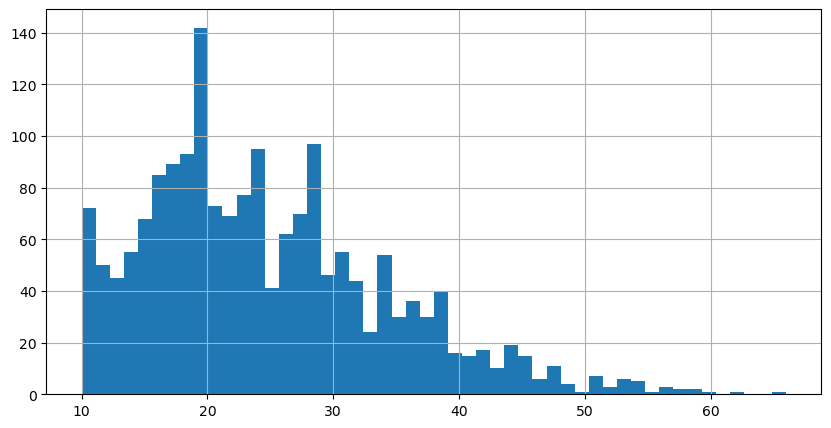

In [26]:
#distribution histogram of target variable tyre life
train_set['tyre_life'].hist(bins=50, figsize=(10,5))

<Axes: >

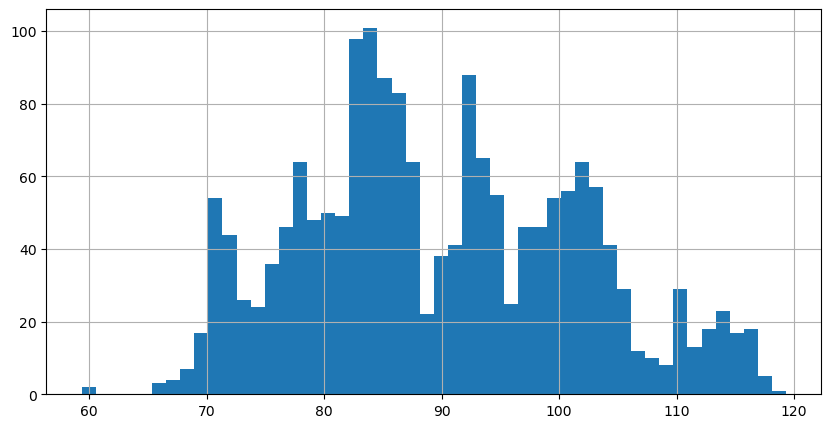

In [27]:
#distribution histogram of average laptime
train_set['average_laptime'].hist(bins=50, figsize=(10,5))

<Axes: >

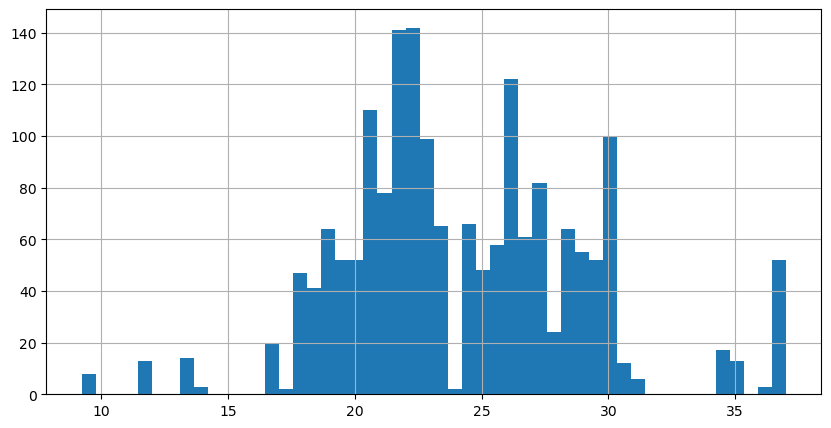

In [28]:
#distribution histogram of average airtemp
train_set['avg_airtemp'].hist(bins=50, figsize=(10,5))

<Axes: >

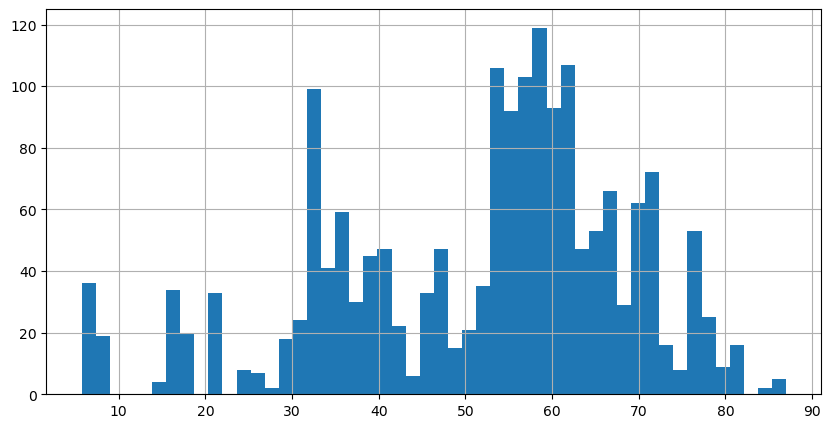

In [29]:
#distribution histogram of average humidity
train_set['avg_humidity'].hist(bins=50, figsize=(10,5))

<Axes: >

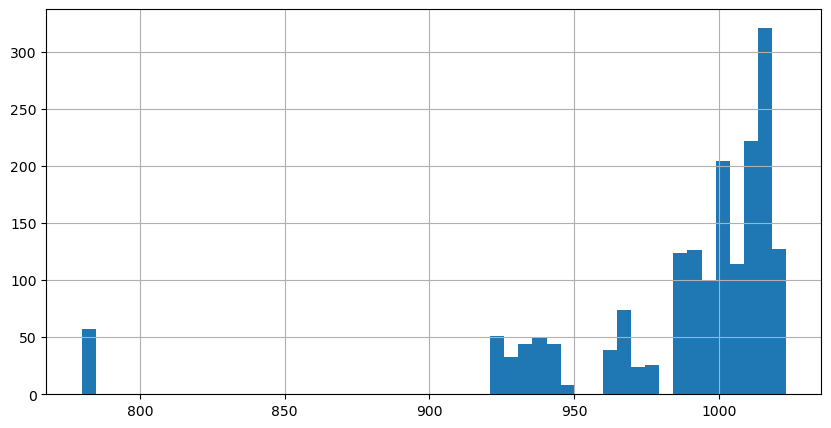

In [30]:
#distribution histogram of average airpressure
train_set['avg_airpressure'].hist(bins=50, figsize=(10,5))

<Axes: >

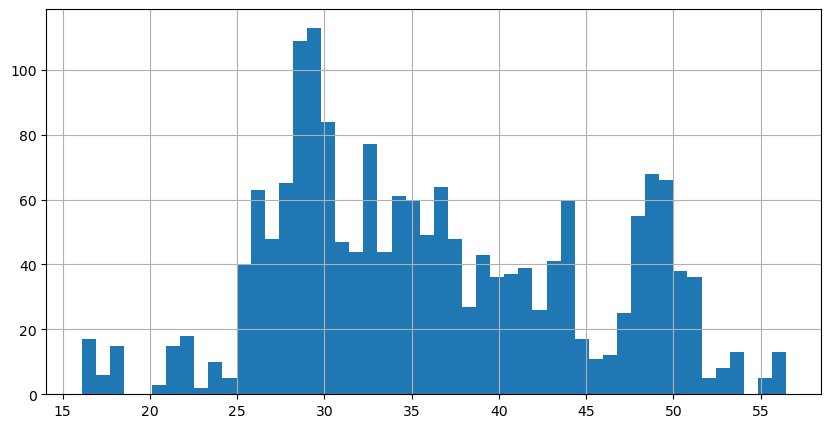

In [31]:
#distribution histogram of average tracktemp
train_set['avg_tracktemp'].hist(bins=50, figsize=(10,5))

In [32]:
#defining the custom palette as per the F1 tyre colours
custom_palette = {"SOFT": "red", "MEDIUM": "gold","HARD":"lightgray"}

<Axes: xlabel='compound', ylabel='tyre_life'>

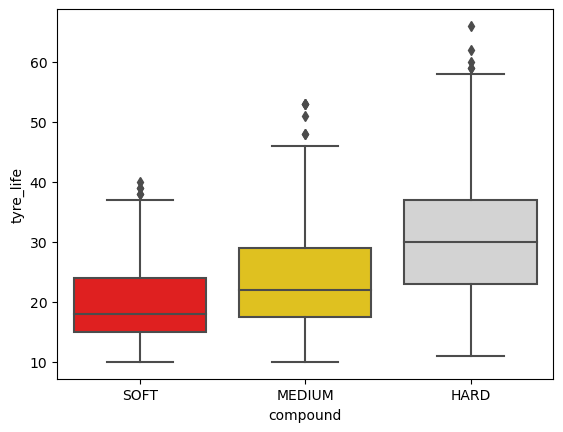

In [33]:
#distribution of tyrelife per compound
sns.boxplot(data=train_set, x="compound", y="tyre_life",palette=custom_palette)

<Axes: xlabel='traction', ylabel='tyre_life'>

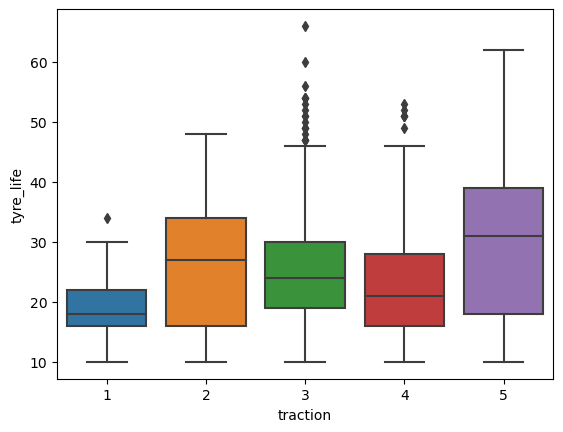

In [34]:
#distribution of tyrelife per traction
sns.boxplot(data=train_set, x="traction", y="tyre_life")

<Axes: xlabel='braking', ylabel='tyre_life'>

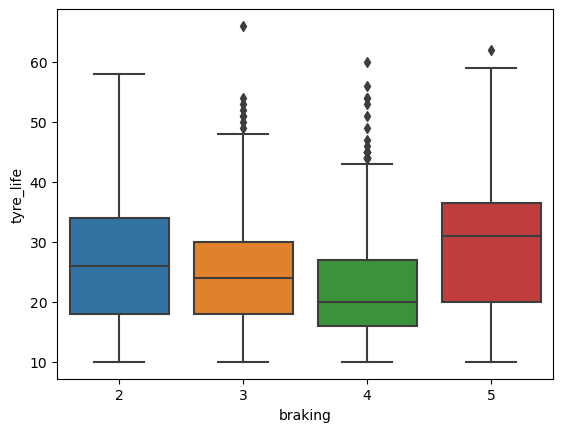

In [35]:
#distribution of tyrelife per braking
sns.boxplot(data=train_set, x="braking", y="tyre_life")

<Axes: xlabel='lateral', ylabel='tyre_life'>

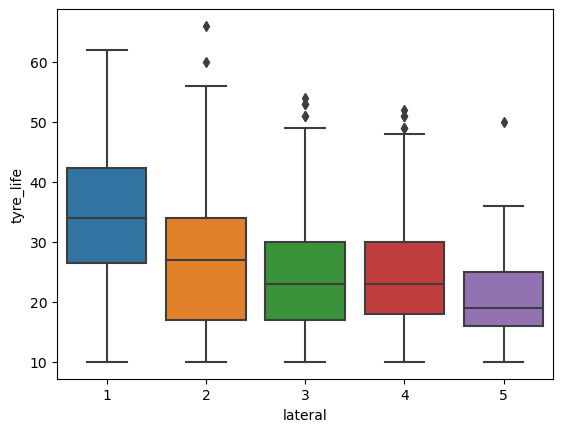

In [36]:
#distribution of tyrelife per lateral
sns.boxplot(data=train_set, x="lateral", y="tyre_life")

<Axes: xlabel='asphalt_grip', ylabel='tyre_life'>

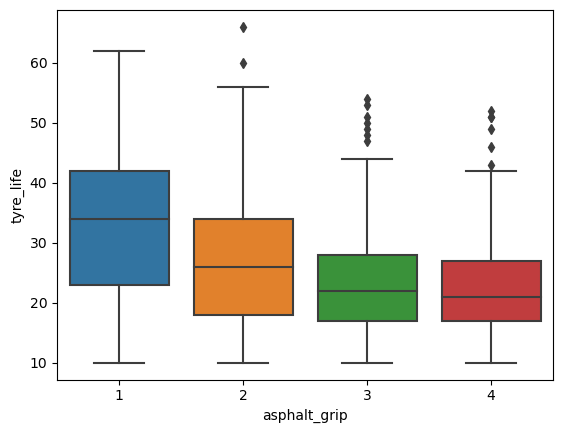

In [37]:
#distribution of tyrelife per asphalt grip
sns.boxplot(data=train_set, x="asphalt_grip", y="tyre_life")

<Axes: xlabel='asphalt_abrasion', ylabel='tyre_life'>

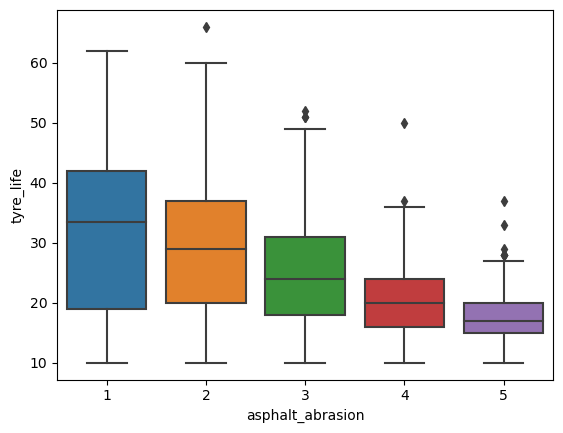

In [38]:
#distribution of tyrelife per asphalt abrasion
sns.boxplot(data=train_set, x="asphalt_abrasion", y="tyre_life")

<Axes: xlabel='track_evolution', ylabel='tyre_life'>

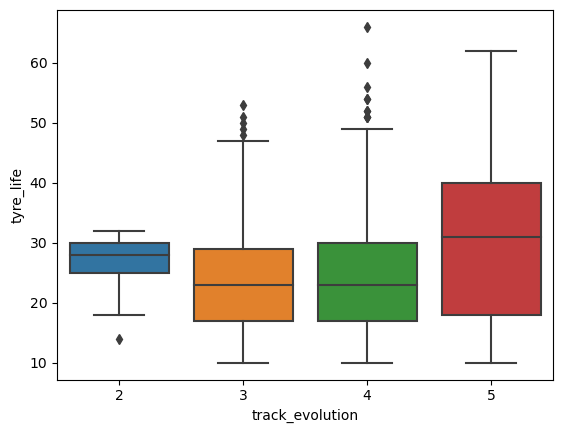

In [39]:
#distribution of tyrelife per track evolution
sns.boxplot(data=train_set, x="track_evolution", y="tyre_life")

<Axes: xlabel='downforce', ylabel='tyre_life'>

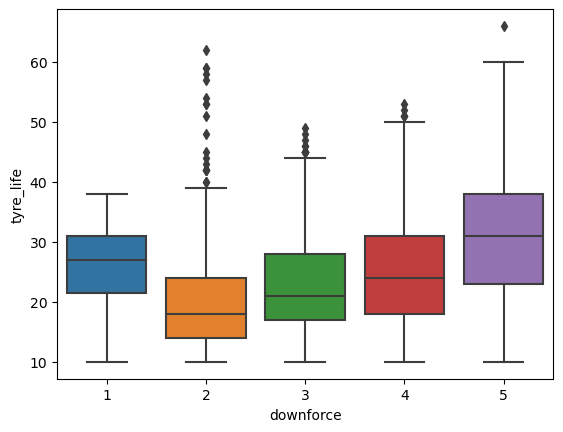

In [40]:
#distribution of tyrelife per downforce
sns.boxplot(data=train_set, x="downforce", y="tyre_life")

<Axes: xlabel='tyre_stress', ylabel='tyre_life'>

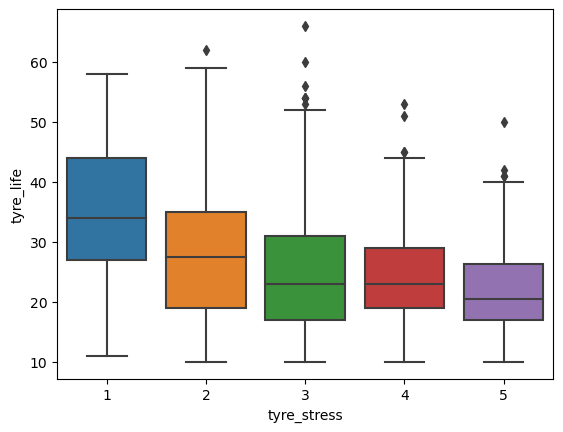

In [41]:
#distribution of tyrelife per tyre stress
sns.boxplot(data=train_set, x="tyre_stress", y="tyre_life")

<Axes: >

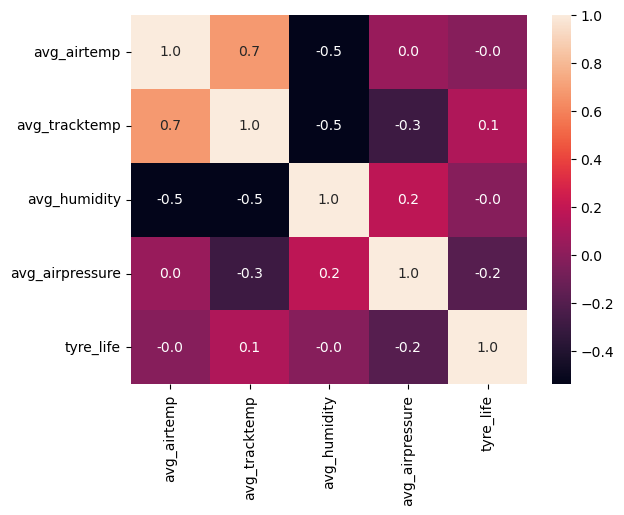

In [42]:
#correlation of numerical data
datacorr = train_set[['avg_airtemp','avg_tracktemp', 'avg_humidity', 'avg_airpressure','tyre_life']]
sns.heatmap(data = datacorr.corr(),annot=True, fmt=".1f")

#### Data Preprocessing

In [43]:
#checking for duplicate records

print(f"There are {sum(train_set.duplicated())} duplicate records in training and {sum(test_set.duplicated())} duplicate records in test data")

There are 0 duplicate records in training and 0 duplicate records in test data


In [44]:
#checking for null values
print(f"There are {sum(train_set.isnull().sum())} empty values in training and {sum(test_set.isnull().sum())} empty values in test data")

There are 0 empty values in training and 0 empty values in test data


In [45]:
# dropping all features that are not required from train set

train_set = train_set.drop(['position_change','EVENT','stint','track_status','freshtyre','average_laptime'],axis=1)

In [46]:
# dropping all features that are not required from test set
test_set = test_set.drop(['position_change','EVENT','stint','track_status','freshtyre','average_laptime'],axis=1)

In [47]:
from sklearn.preprocessing import OneHotEncoder


one_hot_encoder = OneHotEncoder(drop="first",sparse=False,handle_unknown = 'ignore')

# categorical columns to transform
cat_cols = ['circuit','driver','team','compound','traction','braking','lateral','tyre_stress','asphalt_grip','asphalt_abrasion','track_evolution','downforce']

# fit an encoder and transform the **trainset**
cat_vals = train_set[cat_cols].to_numpy()
transformed = one_hot_encoder.fit_transform(cat_vals)

# the names of the new columns are the unique values of the categorical variables
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)

# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    train_set[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
train_set.head()

C:\Users\HAL9K\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1565473898.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_set[new_col_name] = transformed[:,i]
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1565473898.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

,circuit,driver,team,compound,avg_airtemp,avg_humidity,avg_airpressure,avg_tracktemp,traction,braking,...,asphalt_abrasion_3,asphalt_abrasion_4,asphalt_abrasion_5,track_evolution_3,track_evolution_4,track_evolution_5,downforce_2,downforce_3,downforce_4,downforce_5
1137,Abu Dhabi,NOR,McLaren,SOFT,24.541176,58.247059,1017.729412,28.182353,3,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
610,Suzuka,HAM,Mercedes,MEDIUM,21.633333,57.176190,1009.304762,29.690476,3,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1759,Monaco,HAM,Mercedes,MEDIUM,25.364516,43.000000,1013.429032,40.251613,5,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1680,Baku,SAI,Ferrari,SOFT,24.650000,53.720000,1014.990000,40.800000,5,4,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1156,Abu Dhabi,HAM,Mercedes,MEDIUM,28.533333,62.055556,1013.561111,34.005556,4,4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [48]:
# transform the **testset** using the encoder fitted on trainset
cat_vals = test_set[cat_cols].to_numpy()
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    test_set[new_col_name] = transformed[:,i]
    
# check if the dummies are produced correctly in the testset
test_set.head()

C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1290029270.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set[new_col_name] = transformed[:,i]
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1290029270.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_set[new_col_name] = transformed[:,i]
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\1290029270.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

,circuit,driver,team,compound,avg_airtemp,avg_humidity,avg_airpressure,avg_tracktemp,traction,braking,...,asphalt_abrasion_3,asphalt_abrasion_4,asphalt_abrasion_5,track_evolution_3,track_evolution_4,track_evolution_5,downforce_2,downforce_3,downforce_4,downforce_5
2195,Sao Paulo,GIO,Alfa Romeo Racing,SOFT,16.566667,71.420833,927.775000,33.562500,4,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
51,Silverstone,STR,Aston Martin,MEDIUM,29.723810,36.404762,1007.104762,50.685714,3,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
747,Austin,HAM,Mercedes,HARD,21.737500,33.971875,1000.900000,28.868750,4,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
34,Silverstone,MSC,Haas F1 Team,MEDIUM,29.727273,36.513636,1007.100000,50.677273,3,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2084,Mugello,HAM,Mercedes,SOFT,29.921429,40.935714,993.664286,39.592857,1,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
#removing the original categorical variable columns to avoid duplication 

train_set.drop(columns=cat_cols, inplace=True)
test_set.drop(columns=cat_cols, inplace=True)

In [50]:
#checking for null values
print(f"There are {sum(train_set.isnull().sum())} empty values in training and {sum(test_set.isnull().sum())} empty values in test data")

There are 0 empty values in training and 0 empty values in test data


#### Machine Learning Models

In [51]:
#Isolating the target variables of both train and test sets.

# create a copy of the target variable 
ytrain = train_set["tyre_life"].copy()
ytest = test_set["tyre_life"].copy()

# drop the target variable for training set, but keep all predicting variables
xtrain = train_set.drop("tyre_life", axis=1)
xtest = test_set.drop("tyre_life", axis=1)

#### Baseline Model

In [52]:
#the baseline model is the median of all target variables in the training data
baseline_target = ytrain.median()
baseline_target 

23.0

Let's measure it in terms of MAE and RMSE for evaluation

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_price
baseline_yhat = np.full((ytrain.shape[0], 1), baseline_target)

baseline_mae = mean_absolute_error(ytrain, baseline_yhat) #mean_absolute_error
baseline_mse = mean_squared_error(ytrain, baseline_yhat) #mean_squared_error

# take square root of mean_squared_error
baseline_rmse = np.sqrt(baseline_mse)

print("Baseline MAE is ",baseline_mae)
print("Baseline RMSE is ",baseline_rmse)

Baseline MAE is  7.618008948545861
Baseline RMSE is  9.815552877947136


In [54]:
#a new dataframe to record all the metrics for evaluation
results = pd.DataFrame(columns=['Metrics', 'Baseline Model', 'Random Forest Model', 'Gradient Boosting Model'])
results['Metrics'] = ["Mean Absolute Error", "Root Mean Squared Error","R Squared"]

In [55]:
#add the baseline results to the results dataframe
results['Baseline Model'] = [baseline_mae, baseline_rmse,""]

#### Random Forest Regressor

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [10, 30, 50, 100, 150, 200],
     'max_depth': [3,4,5]},
]

rf_regressor = RandomForestRegressor(random_state=7)

# we'll use 10-fold cross-validation
rf_grid_search = GridSearchCV(rf_regressor, param_grid, cv=10, 
                              scoring='neg_root_mean_squared_error',
                              return_train_score=True, verbose=2)

rf_grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=3, n

[CV] END ......................max_depth=4, n_estimators=150; total time=   0.7s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.9s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.9s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.8s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.8s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.9s
[CV] END ......................max_depth=4, n_estimators=150; total time=   0.9s
[CV] END ......................max_depth=4, n_estimators=150; total time=   1.0s
[CV] END ......................max_depth=4, n_estimators=150; total time=   1.0s
[CV] END ......................max_depth=4, n_estimators=200; total time=   1.2s
[CV] END ......................max_depth=4, n_estimators=200; total time=   1.1s
[CV] END ......................max_depth=4, n_estimators=200; total time=   1.3s
[CV] END ...................

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=7),
             param_grid=[{'max_depth': [3, 4, 5],
                          'n_estimators': [10, 30, 50, 100, 150, 200]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [57]:
# training and validation RMSE

rf_cv_results = pd.DataFrame(rf_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
rf_cv_results["mean_train_score"] = -rf_cv_results["mean_train_score"]
rf_cv_results["mean_test_score"] = -rf_cv_results["mean_test_score"]
rf_cv_results["diff, %"] = 100*(rf_cv_results["mean_train_score"]-rf_cv_results["mean_test_score"]
                                                     )/rf_cv_results["mean_train_score"]

rf_cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
16,"{'max_depth': 5, 'n_estimators': 150}",6.502672,6.953081,-6.926522
17,"{'max_depth': 5, 'n_estimators': 200}",6.501340,6.953862,-6.960445
15,"{'max_depth': 5, 'n_estimators': 100}",6.504846,6.956871,-6.949049
14,"{'max_depth': 5, 'n_estimators': 50}",6.509527,6.960489,-6.927720
13,"{'max_depth': 5, 'n_estimators': 30}",6.522578,6.965202,-6.786035
12,"{'max_depth': 5, 'n_estimators': 10}",6.557298,6.978368,-6.421395
7,"{'max_depth': 4, 'n_estimators': 30}",7.117586,7.389513,-3.820488
8,"{'max_depth': 4, 'n_estimators': 50}",7.108044,7.392370,-4.000060
9,"{'max_depth': 4, 'n_estimators': 100}",7.105340,7.397540,-4.112401
10,"{'max_depth': 4, 'n_estimators': 150}",7.101726,7.400052,-4.200752


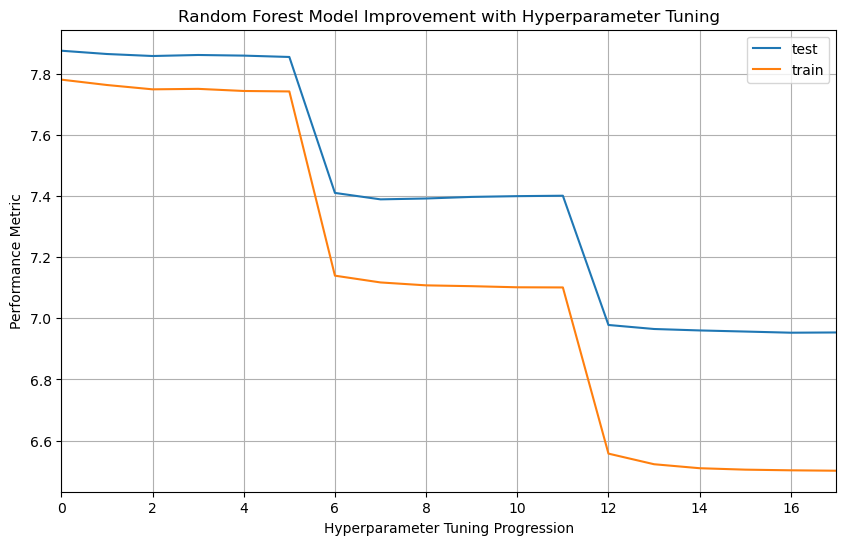

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(rf_cv_results.index,rf_cv_results['mean_test_score'],label='test', linestyle='-')
plt.plot(rf_cv_results.index,rf_cv_results['mean_train_score'],label='train', linestyle='-')
plt.xlabel('Hyperparameter Tuning Progression')
plt.ylabel('Performance Metric')
plt.title('Random Forest Model Improvement with Hyperparameter Tuning')
plt.legend(loc='best')
plt.xlim(0, 17)
plt.grid(True)
plt.show()

In [59]:
# the best model

best_rf_model = rf_grid_search.best_estimator_

In [60]:
# make predictions with the best model
rf_ypred = best_rf_model.predict(xtest)  

In [61]:
# Calculate the MAE, RMSE and R2
from sklearn.metrics import r2_score
rf_mae = mean_absolute_error(ytest, rf_ypred)  #mean_absolute_error

rf_mse = mean_squared_error(ytest, rf_ypred) #mean_squared_error
# take square root of mean_squared_error
rf_rmse = np.sqrt(rf_mse) #root_mean_squared_error

rf_r2 = r2_score(ytest, rf_ypred) #R2_score

In [62]:
print("Random Forest MAE is ",rf_mae)
print("Random Forest RMSE is ",rf_rmse)
print("Random Forest R2 is ",rf_r2)

Random Forest MAE is  6.052310601748494
Random Forest RMSE is  8.015541193307538
Random Forest R2 is  0.4415488925415588


In [63]:
#add the random forest results to the results dataframe
results['Random Forest Model'] = [rf_mae, rf_rmse, rf_r2]

In [64]:
# make predictions on training data
rf_yhat = best_rf_model.predict(xtrain)

<Axes: >

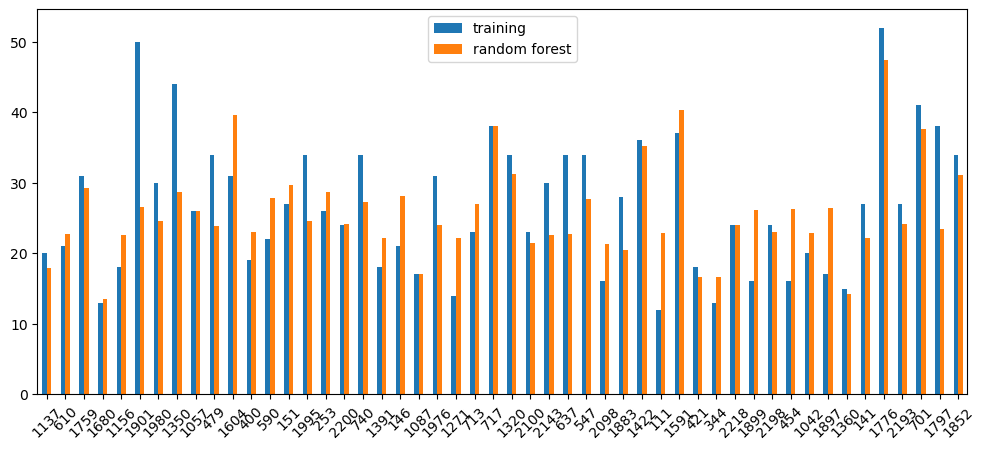

In [65]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"training": ytrain[:50], "random forest": rf_yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=45)

#### Feature Importance

In [66]:
best_rf_model.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=7)

In [67]:
rf_feature_importance = best_rf_model.feature_importances_

In [68]:
feature_names = xtrain.columns  # Replace with your actual feature names
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

In [69]:
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

In [70]:
forest_feature_importance = pd.DataFrame(columns=['Feature','Importance'])

In [71]:
# Assuming you have your existing DataFrame feature_imp
# List of features to sum
features_compound = ['compound_SOFT', 'compound_MEDIUM']
features_traction = ['traction_2','traction_3','traction_4','traction_5']
features_asphalt_abrasion = ['asphalt_abrasion_2','asphalt_abrasion_3','asphalt_abrasion_4','asphalt_abrasion_5']
features_asphalt_grip = ['asphalt_grip_2','asphalt_grip_3','asphalt_grip_4','asphalt_grip_5']
features_braking = ['braking_2','braking_3','braking_4','braking_5']
features_track_evolution = ['track_evolution_2','track_evolution_3','track_evolution_4','track_evolution_5']
features_tyre_stress = ['tyre_stress_2','tyre_stress_3','tyre_stress_4','tyre_stress_5']
features_lateral = ['lateral_2','lateral_3','lateral_4','lateral_5']
features_downforce = ['downforce_2','downforce_3','downforce_4','downforce_5']
features_team = ['team_Alfa Romeo Racing','team_AlphaTauri','team_Alpine','team_Aston Martin','team_Ferrari','team_Haas F1 Team','team_McLaren','team_Mercedes','team_Racing Point','team_Red Bull Racing','team_Renault','team_Toro Rosso','team_Williams']
features_drivers = ['driver_ALO','driver_BOT','driver_DEV','driver_FIT','driver_GAS','driver_GIO','driver_GRO','driver_HAM','driver_HUL','driver_KUB','driver_KVY','driver_LAT','driver_LEC','driver_MAG','driver_MAZ','driver_MSC','driver_NOR','driver_OCO','driver_PER','driver_PIA','driver_RAI','driver_RIC','driver_RUS','driver_SAI','driver_SAR','driver_STR','driver_TSU','driver_VER','driver_VET','driver_ZHO',]
features_circuit = ['circuit_Austin','circuit_Baku','circuit_Barcelona','circuit_Budapest','circuit_Hockenhiem','circuit_Imola','circuit_Jeddah','circuit_Le Castellet','circuit_Lusail','circuit_Melbourne','circuit_Mexico City','circuit_Miami','circuit_Monaco','circuit_Montreal','circuit_Monza','circuit_Mugello','circuit_Nurburg','circuit_Portimao','circuit_Sakhir','circuit_Sao Paulo','circuit_Shanghai','circuit_Silverstone','circuit_Singapore','circuit_Sochi','circuit_Spa','circuit_Spielberg','circuit_Suzuka','circuit_Zandvoort',]
features_airpressure = ['avg_airpressure']
features_airtemp = ['ave_airtemp']
features_humidity = ['avg_humidity']
features_tracktemp = ['avg_tracktemp']

# Filter the rows for selected features
filtered_compound = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_compound)]
filtered_traction = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_traction)]
filtered_asphalt_abrasion = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_asphalt_abrasion)]
filtered_asphalt_grip = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_asphalt_grip)]
filtered_braking = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_braking)]
filtered_track_evolution = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_track_evolution)]
filtered_lateral = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_lateral)]
filtered_downforce = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_downforce)]
filtered_tyre_stress = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_tyre_stress)]
filtered_features_team = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_team)]
filtered_features_drivers = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_drivers)]
filtered_features_circuit = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_circuit)]
filtered_airpressure = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_airpressure)]
filtered_airtemp = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_airtemp)]
filtered_humidity = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_humidity)]
filtered_tracktemp = rf_feature_importance_df[rf_feature_importance_df['Feature'].isin(features_tracktemp)]

# Calculate the total importance
total_importance_compound = filtered_compound['Importance'].sum()
total_importance_traction = filtered_traction['Importance'].sum()
total_importance_asphalt_abrasion = filtered_asphalt_abrasion['Importance'].sum()
total_importance_asphalt_grip = filtered_asphalt_grip['Importance'].sum()
total_importance_braking = filtered_braking['Importance'].sum()
total_importance_track_evolution = filtered_track_evolution['Importance'].sum()
total_importance_lateral = filtered_lateral['Importance'].sum()
total_importance_downforce = filtered_downforce['Importance'].sum()
total_importance_tyre_stress = filtered_tyre_stress['Importance'].sum()
total_importance_team = filtered_features_team['Importance'].sum()
total_importance_drivers = filtered_features_drivers['Importance'].sum()
total_importance_circuit = filtered_features_circuit['Importance'].sum()
total_airpressure = filtered_airpressure['Importance'].sum()
total_airtemp = filtered_airtemp['Importance'].sum()
total_humidity = filtered_humidity['Importance'].sum()
total_tracktemp = filtered_tracktemp['Importance'].sum()


# Create a new DataFrame with the total importance
compound_total= pd.DataFrame({'Feature': ['Compound'], 'Importance': [total_importance_compound]})
traction_total = pd.DataFrame({'Feature': ['Traction'], 'Importance': [total_importance_traction]})
asphalt_abrasion_total = pd.DataFrame({'Feature': ['Asphalt Abrasion'], 'Importance': [total_importance_asphalt_abrasion]})
asphalt_grip_total = pd.DataFrame({'Feature': ['Asphalt Grip'], 'Importance': [total_importance_asphalt_grip]})
braking_total = pd.DataFrame({'Feature': ['Braking'], 'Importance': [total_importance_braking]})
track_evolution_total = pd.DataFrame({'Feature': ['Track Evolution'], 'Importance': [total_importance_track_evolution]})
lateral_total = pd.DataFrame({'Feature': ['Lateral'], 'Importance': [total_importance_lateral]})
downforce_total = pd.DataFrame({'Feature': ['Downforce'], 'Importance': [total_importance_downforce]})
tyre_stress_total = pd.DataFrame({'Feature': ['Tyre Stress'], 'Importance': [total_importance_tyre_stress]})
team_total = pd.DataFrame({'Feature': ['Team'], 'Importance': [total_importance_team]})
drivers_total = pd.DataFrame({'Feature': ['Drivers'], 'Importance': [total_importance_drivers]})
circuit_total = pd.DataFrame({'Feature': ['Circuit'], 'Importance': [total_importance_circuit]})
airpressure_total= pd.DataFrame({'Feature': ['Avg Air Pressure'], 'Importance': [total_airpressure]})
airtemp_total = pd.DataFrame({'Feature': ['Avg Air Temperature'], 'Importance': [total_airtemp]})
humidity_total = pd.DataFrame({'Feature': ['Avg Humidity'], 'Importance': [total_humidity]})
tracktemp_total = pd.DataFrame({'Feature': ['Avg Track Temperature'], 'Importance': [total_tracktemp]})

# Append the total row to the existing DataFrame
forest_feature_importance = forest_feature_importance.append(compound_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(traction_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(asphalt_abrasion_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(asphalt_grip_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(braking_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(track_evolution_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(lateral_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(downforce_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(tyre_stress_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(team_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(drivers_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(circuit_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(airpressure_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(airtemp_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(humidity_total, ignore_index=True)
forest_feature_importance = forest_feature_importance.append(tracktemp_total, ignore_index=True)


# Print the total_feature_imp DataFrame
print(forest_feature_importance)

                  Feature  Importance
0                Compound    0.361482
1                Traction    0.010627
2        Asphalt Abrasion    0.027965
3            Asphalt Grip    0.022109
4                 Braking    0.002677
5         Track Evolution    0.115522
6                 Lateral    0.016519
7               Downforce    0.048820
8             Tyre Stress    0.002907
9                    Team    0.006769
10                Drivers    0.009023
11                Circuit    0.103195
12       Avg Air Pressure    0.092847
13    Avg Air Temperature    0.000000
14           Avg Humidity    0.049501
15  Avg Track Temperature    0.076826


C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2592522856.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forest_feature_importance = forest_feature_importance.append(compound_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2592522856.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forest_feature_importance = forest_feature_importance.append(traction_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2592522856.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forest_feature_importance = forest_feature_importance.append(asphalt_abrasion_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2592522856.py:79: FutureWarning: The frame.ap

In [72]:
forest_feature_importance = forest_feature_importance.sort_values(by='Importance', ascending=True)

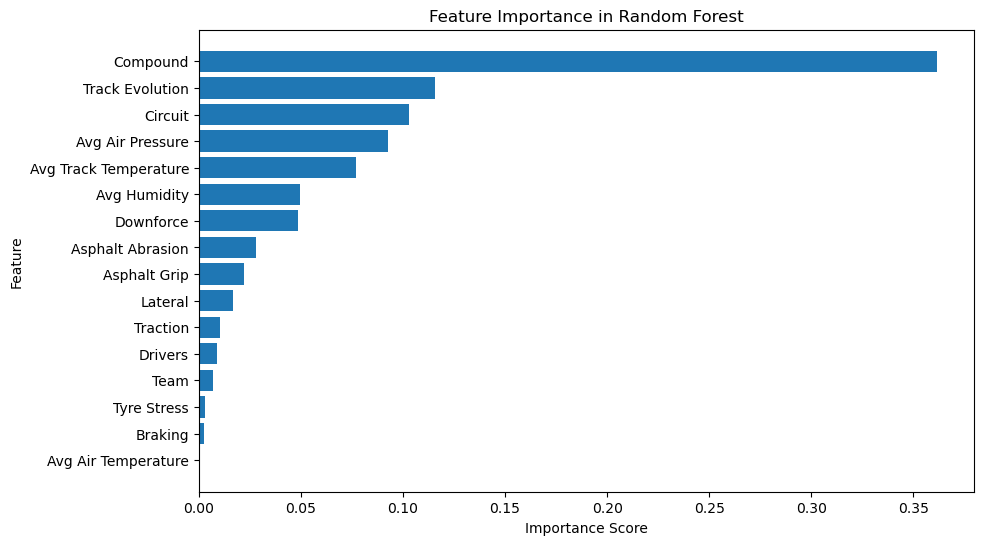

In [73]:
plt.figure(figsize=(10, 6))
plt.barh(forest_feature_importance['Feature'], forest_feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

#### Gradient Tree Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
#define gb regressor
gb_regressor = GradientBoostingRegressor(random_state = 7)


# specify the hyperparameters and their values
param_grid = [
    {'n_estimators': [10, 30, 50, 100, 150, 200],
     'learning_rate': [0.01, 0.05, 0.1],
     'max_depth': [3, 4, 5]},
]

# we'll use 10-fold cross-validation
gb_grid_search = GridSearchCV(gb_regressor, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True, verbose=2)

gb_grid_search.fit(xtrain, ytrain)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=30; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=3, n

[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=150; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.0

[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ..learning_rate=0.0

[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=10; total time=   0.0s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.3s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=30; total time=   0.2s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=150; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.2s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=10; total time=   0.0s
[CV] END ....learning_rate=0

[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   1.5s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   1.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   1.5s
[CV] END ...learning_rate=0.

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=7),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
                          'max_depth': [3, 4, 5],
                          'n_estimators': [10, 30, 50, 100, 150, 200]}],
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [76]:
# training and validation RMSE

gb_cv_results = pd.DataFrame(gb_grid_search.cv_results_)[['params', 'mean_train_score', 'mean_test_score']]
gb_cv_results["mean_train_score"] = -gb_cv_results["mean_train_score"]
gb_cv_results["mean_test_score"] = -gb_cv_results["mean_test_score"]
gb_cv_results["diff, %"] = 100*(gb_cv_results["mean_train_score"]-gb_cv_results["mean_test_score"]
                                                     )/gb_cv_results["mean_train_score"]

gb_cv_results.sort_values('mean_test_score')

,params,mean_train_score,mean_test_score,"diff, %"
53,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",2.647685,5.567573,-110.280768
52,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",3.184264,5.665127,-77.910104
47,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",3.605842,5.799317,-60.831140
35,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",3.935326,5.802376,-47.443345
51,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",3.878488,5.814415,-49.914456
34,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",4.323989,5.891752,-36.257339
46,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",4.079670,5.906390,-44.776172
50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",4.778685,6.033053,-26.249241
33,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",4.789220,6.040242,-26.121617
29,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",4.737384,6.040880,-27.515113


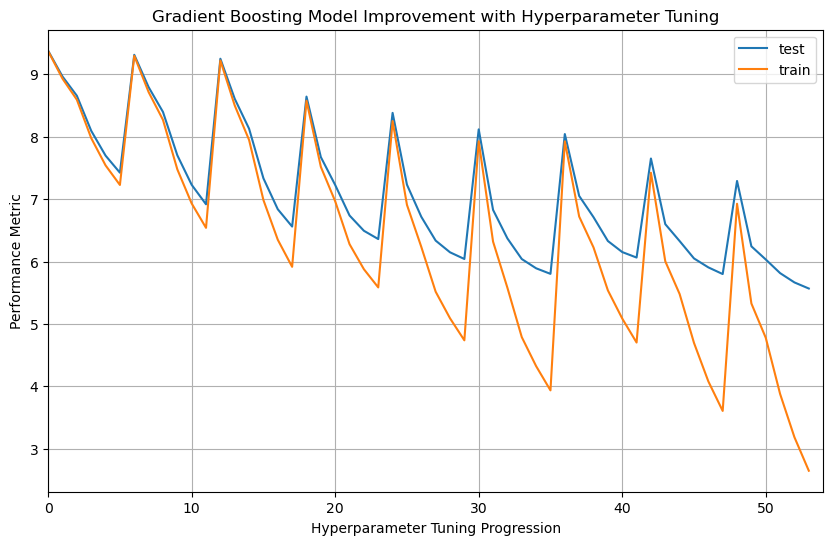

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(gb_cv_results.index,gb_cv_results['mean_test_score'],label='test', linestyle='-')
plt.plot(gb_cv_results.index,gb_cv_results['mean_train_score'],label='train', linestyle='-')
plt.xlabel('Hyperparameter Tuning Progression')
plt.ylabel('Performance Metric')
plt.title('Gradient Boosting Model Improvement with Hyperparameter Tuning')
plt.legend(loc='best')
plt.xlim(0, 54)
plt.grid(True)
plt.show()

In [78]:
# the best model

best_gb_model = gb_grid_search.best_estimator_

In [79]:
# make predictions with the best model
gb_ypred = best_gb_model.predict(xtest)  

In [80]:
# Calculate the MAE, RMSE and R2
gb_mae = mean_absolute_error(ytest, gb_ypred)  #mean_absolute_error

gb_mse = mean_squared_error(ytest, gb_ypred) #mean_squared_error
# take square root of mean_squared_error
gb_rmse = np.sqrt(gb_mse) #root_mean_squared_error

gb_r2 = r2_score(ytest, gb_ypred) #R2_score

In [81]:
print("Gradient Boosting MAE is ",gb_mae)
print("Gradient Boosting RMSE is ",gb_rmse)
print("Gradient Boosting R2 is ",gb_r2)

Gradient Boosting MAE is  4.068471763894512
Gradient Boosting RMSE is  6.117150927158025
Gradient Boosting R2 is  0.6747495938579068


In [82]:
#add the random forest results to the results dataframe
results['Gradient Boosting Model'] = [gb_mae, gb_rmse, gb_r2]

In [83]:
# make predictions on training data
gb_yhat = best_gb_model.predict(xtrain)

<Axes: >

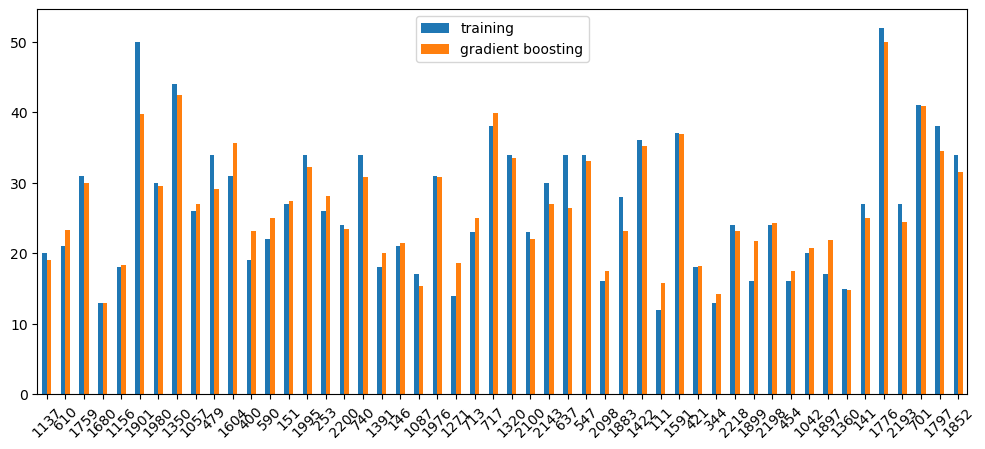

In [84]:
# create a temporary dataframe containing two columns
df_tmp = pd.DataFrame({"training": ytrain[:50], "gradient boosting": gb_yhat[:50]})

# plot the dataframe
df_tmp.plot(figsize=(12,5), kind="bar", rot=45)

#### Feature Importance

In [85]:
best_gb_model.fit(xtrain, ytrain)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=7)

In [86]:
gb_feature_importance = best_gb_model.feature_importances_

In [87]:
feature_names = xtrain.columns  # Replace with your actual feature names
gb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb_feature_importance})

In [88]:
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

In [89]:
boosting_feature_importance = pd.DataFrame(columns=['Feature','Importance'])

In [90]:
# Assuming you have your existing DataFrame feature_imp
# List of features to sum
features_compound = ['compound_SOFT', 'compound_MEDIUM']
features_traction = ['traction_2','traction_3','traction_4','traction_5']
features_asphalt_abrasion = ['asphalt_abrasion_2','asphalt_abrasion_3','asphalt_abrasion_4','asphalt_abrasion_5']
features_asphalt_grip = ['asphalt_grip_2','asphalt_grip_3','asphalt_grip_4','asphalt_grip_5']
features_braking = ['braking_2','braking_3','braking_4','braking_5']
features_track_evolution = ['track_evolution_2','track_evolution_3','track_evolution_4','track_evolution_5']
features_tyre_stress = ['tyre_stress_2','tyre_stress_3','tyre_stress_4','tyre_stress_5']
features_lateral = ['lateral_2','lateral_3','lateral_4','lateral_5']
features_downforce = ['downforce_2','downforce_3','downforce_4','downforce_5']
features_team = ['team_Alfa Romeo Racing','team_AlphaTauri','team_Alpine','team_Aston Martin','team_Ferrari','team_Haas F1 Team','team_McLaren','team_Mercedes','team_Racing Point','team_Red Bull Racing','team_Renault','team_Toro Rosso','team_Williams']
features_drivers = ['driver_ALO','driver_BOT','driver_DEV','driver_FIT','driver_GAS','driver_GIO','driver_GRO','driver_HAM','driver_HUL','driver_KUB','driver_KVY','driver_LAT','driver_LEC','driver_MAG','driver_MAZ','driver_MSC','driver_NOR','driver_OCO','driver_PER','driver_PIA','driver_RAI','driver_RIC','driver_RUS','driver_SAI','driver_SAR','driver_STR','driver_TSU','driver_VER','driver_VET','driver_ZHO',]
features_circuit = ['circuit_Austin','circuit_Baku','circuit_Barcelona','circuit_Budapest','circuit_Hockenhiem','circuit_Imola','circuit_Jeddah','circuit_Le Castellet','circuit_Lusail','circuit_Melbourne','circuit_Mexico City','circuit_Miami','circuit_Monaco','circuit_Montreal','circuit_Monza','circuit_Mugello','circuit_Nurburg','circuit_Portimao','circuit_Sakhir','circuit_Sao Paulo','circuit_Shanghai','circuit_Silverstone','circuit_Singapore','circuit_Sochi','circuit_Spa','circuit_Spielberg','circuit_Suzuka','circuit_Zandvoort',]
features_airpressure = ['avg_airpressure']
features_airtemp = ['ave_airtemp']
features_humidity = ['avg_humidity']
features_tracktemp = ['avg_tracktemp']

# Filter the rows for selected features
filtered_compound = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_compound)]
filtered_traction = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_traction)]
filtered_asphalt_abrasion = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_asphalt_abrasion)]
filtered_asphalt_grip = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_asphalt_grip)]
filtered_braking = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_braking)]
filtered_track_evolution = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_track_evolution)]
filtered_lateral = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_lateral)]
filtered_downforce = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_downforce)]
filtered_tyre_stress = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_tyre_stress)]
filtered_features_team = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_team)]
filtered_features_drivers = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_drivers)]
filtered_features_circuit = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_circuit)]
filtered_airpressure = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_airpressure)]
filtered_airtemp = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_airtemp)]
filtered_humidity = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_humidity)]
filtered_tracktemp = gb_feature_importance_df[gb_feature_importance_df['Feature'].isin(features_tracktemp)]


# Calculate the total importance
total_importance_compound = filtered_compound['Importance'].sum()
total_importance_traction = filtered_traction['Importance'].sum()
total_importance_asphalt_abrasion = filtered_asphalt_abrasion['Importance'].sum()
total_importance_asphalt_grip = filtered_asphalt_grip['Importance'].sum()
total_importance_braking = filtered_braking['Importance'].sum()
total_importance_track_evolution = filtered_track_evolution['Importance'].sum()
total_importance_lateral = filtered_lateral['Importance'].sum()
total_importance_downforce = filtered_downforce['Importance'].sum()
total_importance_tyre_stress = filtered_tyre_stress['Importance'].sum()
total_importance_team = filtered_features_team['Importance'].sum()
total_importance_drivers = filtered_features_drivers['Importance'].sum()
total_importance_circuit = filtered_features_circuit['Importance'].sum()
total_airpressure = filtered_airpressure['Importance'].sum()
total_airtemp = filtered_airtemp['Importance'].sum()
total_humidity = filtered_humidity['Importance'].sum()
total_tracktemp = filtered_tracktemp['Importance'].sum()


# Create a new DataFrame with the total importance
compound_total= pd.DataFrame({'Feature': ['Compound'], 'Importance': [total_importance_compound]})
traction_total = pd.DataFrame({'Feature': ['Traction'], 'Importance': [total_importance_traction]})
asphalt_abrasion_total = pd.DataFrame({'Feature': ['Asphalt Abrasion'], 'Importance': [total_importance_asphalt_abrasion]})
asphalt_grip_total = pd.DataFrame({'Feature': ['Asphalt Grip'], 'Importance': [total_importance_asphalt_grip]})
braking_total = pd.DataFrame({'Feature': ['Braking'], 'Importance': [total_importance_braking]})
track_evolution_total = pd.DataFrame({'Feature': ['Track Evolution'], 'Importance': [total_importance_track_evolution]})
lateral_total = pd.DataFrame({'Feature': ['Lateral'], 'Importance': [total_importance_lateral]})
downforce_total = pd.DataFrame({'Feature': ['Downforce'], 'Importance': [total_importance_downforce]})
tyre_stress_total = pd.DataFrame({'Feature': ['Tyre Stress'], 'Importance': [total_importance_tyre_stress]})
team_total = pd.DataFrame({'Feature': ['Team'], 'Importance': [total_importance_team]})
drivers_total = pd.DataFrame({'Feature': ['Drivers'], 'Importance': [total_importance_drivers]})
circuit_total = pd.DataFrame({'Feature': ['Circuit'], 'Importance': [total_importance_circuit]})
airpressure_total= pd.DataFrame({'Feature': ['Avg Air Pressure'], 'Importance': [total_airpressure]})
airtemp_total = pd.DataFrame({'Feature': ['Avg Air Temperature'], 'Importance': [total_airtemp]})
humidity_total = pd.DataFrame({'Feature': ['Avg Humidity'], 'Importance': [total_humidity]})
tracktemp_total = pd.DataFrame({'Feature': ['Avg Track Temperature'], 'Importance': [total_tracktemp]})

# Append the total row to the existing DataFrame
boosting_feature_importance = boosting_feature_importance.append(compound_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(traction_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(asphalt_abrasion_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(asphalt_grip_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(braking_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(track_evolution_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(lateral_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(downforce_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(tyre_stress_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(team_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(drivers_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(circuit_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(airpressure_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(airtemp_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(humidity_total, ignore_index=True)
boosting_feature_importance = boosting_feature_importance.append(tracktemp_total, ignore_index=True)


# Print the total_feature_imp DataFrame
print(boosting_feature_importance)

                  Feature  Importance
0                Compound    0.193338
1                Traction    0.009209
2        Asphalt Abrasion    0.031096
3            Asphalt Grip    0.019136
4                 Braking    0.005893
5         Track Evolution    0.056556
6                 Lateral    0.016340
7               Downforce    0.047664
8             Tyre Stress    0.001944
9                    Team    0.018982
10                Drivers    0.025681
11                Circuit    0.094284
12       Avg Air Pressure    0.143786
13    Avg Air Temperature    0.000000
14           Avg Humidity    0.098811
15  Avg Track Temperature    0.139092


C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2771408478.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boosting_feature_importance = boosting_feature_importance.append(compound_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2771408478.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boosting_feature_importance = boosting_feature_importance.append(traction_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2771408478.py:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boosting_feature_importance = boosting_feature_importance.append(asphalt_abrasion_total, ignore_index=True)
C:\Users\HAL9K\AppData\Local\Temp\ipykernel_24128\2771408478.py:80: FutureWarning: 

In [91]:
boosting_feature_importance = boosting_feature_importance.sort_values(by='Importance', ascending=True)

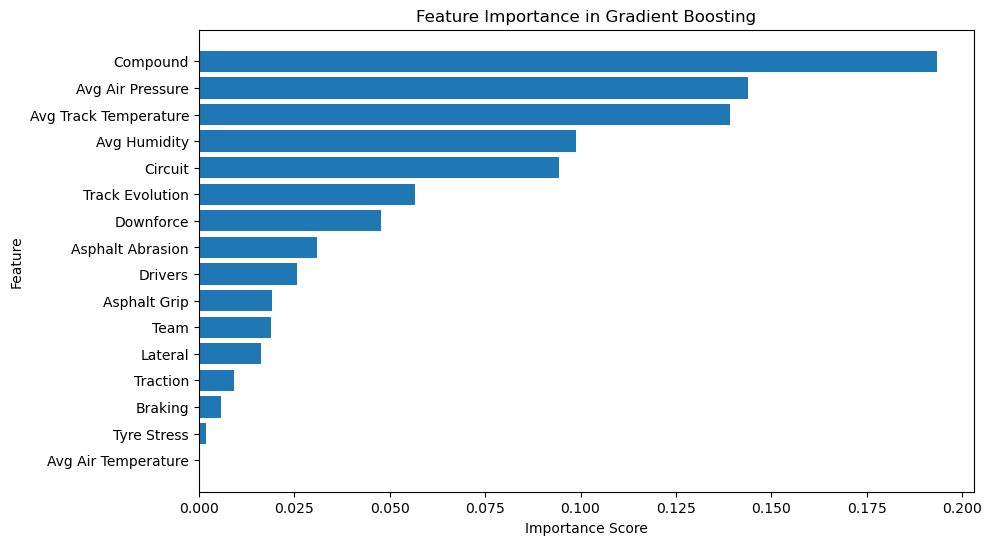

In [92]:
plt.figure(figsize=(10, 6))
plt.barh(boosting_feature_importance['Feature'], boosting_feature_importance['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.show()

In [93]:
results

,Metrics,Baseline Model,Random Forest Model,Gradient Boosting Model
0,Mean Absolute Error,7.618009,6.052311,4.068472
1,Root Mean Squared Error,9.815553,8.015541,6.117151
2,R Squared,,0.441549,0.674750
